In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re

In [2]:
pd.set_option('display.max_columns', None)

#Christian's code to convert and read in the dataframe minus the 2 blank rows

In [3]:
def convert_dtype(x):
    if not x:
        return ''
    try:
        return str(x)
    except:
        return ''
def convert_dtypea(x):
    if not x:
        return ''
    try:
        return int(x)
    except:
        return ''

In [4]:
smile = pd.read_csv('../data/Smileon.2021.10.17.csv', skiprows=2, header=0, encoding='latin-1', converters={
    'LinkedToCallReportNum':convert_dtype, 'ThirdPartyStateProvince':convert_dtype, 'FeedbackFromPhoneWorkerName':convert_dtype,
'SMILE ON 60+ Demographic Information - # of People in Household':convert_dtypea, 'Birth Year':convert_dtypea, 'SMILE ON 60+ Oral Care Encounter - 2393 - Quantity':convert_dtypea,
'SMILE ON 60+ Oral Care Encounter - 2950 - Quantity':convert_dtypea, 'SMILE ON 60+ Oral Care Encounter - 4342 - Quantity':convert_dtypea,
'SMILE ON 60+ Oral Care Encounter - 7140 - Quantity':convert_dtypea, 'SMILE ON 60+ Oral Care Encounter - 7320 - Quantity':convert_dtypea,
'SMILE ON 60+ Oral Care Encounter - Lab Assist narrative':convert_dtype, 'SMILE ON 60+ Case Management Information - What is the outcome for the client?':convert_dtype,
'SMILE ON 60+ Case Management Information - Dental Clinic':convert_dtype})

/Users/lesleyeasley/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (36,59) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
smile2 = smile.drop(columns = ['SMILE ON 60+ Presumptive Eligibility - What is the next step for clients encounter?'])

In [6]:
smile.head()

,CallReportNum,ReportVersion,LinkedToCallReportNum,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,CallerNum,PhoneWorkerNum,WasRealCall,WasHangup,WasSexCall,WasWrongNumber,WasPrankCall,WasSilentCall,GeoCode,GeoAssignment,CityName,CountyName,StateProvince,CountryName,PostalCode,CensusDivision,CensusTrack,CensusReportingArea,211Region,PhoneType,ThirdPartyName,ThirdPartyOrganization,ThirdPartyPhoneNumber,ThirdPartyAddress,ThirdPartyCity,ThirdPartyCounty,ThirdPartyStateProvince,ThirdPartyPostalCode,Narrative,VolunteerComments,Feedback,CallersFeedback,TextField2,TextField3,TextField4,TextField5,TextField6,TextField7,TextField8,TextField9,TextField10,EnteredByWorkerNum,EnteredOn,Supervisor,Reviewed,FeedbackStatus,FeedbackFromPhoneWorkerNum,FeedbackFromPhoneWorkerName,ReferralsMade,IPAddress,OrgNum,VolIdentifier,SMILE ON 60+ Demographic Information - # of People in Household,Birth Year,SMILE ON 60+ Demographic Information - Other Language,SMILE ON 60+ Notes (Optional) - Notes,SMILE ON 60+ Oral Care Encounter - 1351 - Quantity,SMILE ON 60+ Oral Care Encounter - 1354 - Quantity,SMILE ON 60+ Oral Care Encounter - 2140 - Quantity,SMILE ON 60+ Oral Care Encounter - 2150 - Quantity,SMILE ON 60+ Oral Care Encounter - 2160 - Quantity,SMILE ON 60+ Oral Care Encounter - 2161 - Quantity,SMILE ON 60+ Oral Care Encounter - 220 - Quantity,SMILE ON 60+ Oral Care Encounter - 230 - Quantity,SMILE ON 60+ Oral Care Encounter - 2330 - Quantity,SMILE ON 60+ Oral Care Encounter - 2331 - Quantity,SMILE ON 60+ Oral Care Encounter - 2332 - Quantity,SMILE ON 60+ Oral Care Encounter - 2335 - Quantity,SMILE ON 60+ Oral Care Encounter - 2390 - Quantity,SMILE ON 60+ Oral Care Encounter - 2391 - Quantity,SMILE ON 60+ Oral Care Encounter - 2392 - Quantity,SMILE ON 60+ Oral Care Encounter - 2393 - Quantity,SMILE ON 60+ Oral Care Encounter - 2394 - Quantity,SMILE ON 60+ Oral Care Encounter - 2915 - Quantity,SMILE ON 60+ Oral Care Encounter - 2920 - Quantity,SMILE ON 60+ Oral Care Encounter - 2933 - Quantity,SMILE ON 60+ Oral Care Encounter - 2940 - Quantity,SMILE ON 60+ Oral Care Encounter - 2950 - Quantity,SMILE ON 60+ Oral Care Encounter - 2954 - Quantity,SMILE ON 60+ Oral Care Encounter - 2955 - Quantity,SMILE ON 60+ Oral Care Encounter - 2980 - Quantity,SMILE ON 60+ Oral Care Encounter - 3220 - Quantity,SMILE ON 60+ Oral Care Encounter - 4341 - Quantity,SMILE ON 60+ Oral Care Encounter - 4342 - Quantity,SMILE ON 60+ Oral Care Encounter - 6930 - Quantity,SMILE ON 60+ Oral Care Encounter - 6980 - Quantity,SMILE ON 60+ Oral Care Encounter - 7111 - Quantity,SMILE ON 60+ Oral Care Encounter - 7140 - Quantity,SMILE ON 60+ Oral Care Encounter - 7210 - Quantity,SMILE ON 60+ Oral Care Encounter - 7220 - Quantity,SMILE ON 60+ Oral Care Encounter - 7230 - Quantity,SMILE ON 60+ Oral Care Encounter - 7240 - Quantity,SMILE ON 60+ Oral Care Encounter - 7241 - Quantity,SMILE ON 60+ Oral Care Encounter - 7250 - Quantity,SMILE ON 60+ Oral Care Encounter - 7261 - Quantity,SMILE ON 60+ Oral Care Encounter - 7285 - Quantity,SMILE ON 60+ Oral Care Encounter - 7286 - Quantity,SMILE ON 60+ Oral Care Encounter - 7310 - Quantity,SMILE ON 60+ Oral Care Encounter - 7311 - Quantity,SMILE ON 60+ Oral Care Encounter - 7320 - Quantity,SMILE ON 60+ Oral Care Encounter - 7321 - Quantity,SMILE ON 60+ Oral Care Encounter - 7410 - Quantity,SMILE ON 60+ Oral Care Encounter - 7411 - Quantity,SMILE ON 60+ Oral Care Encounter - 7412 - Quantity,SMILE ON 60+ Oral Care Encounter - 7413 - Quantity,SMILE ON 60+ Oral Care Encounter - 7414 - Quantity,SMILE ON 60+ Oral Care Encounter - 7415 - Quantity,SMILE ON 60+ Oral Care Encounter - 7440 - Quantity,SMILE ON 60+ Oral Care Encounter - 7450 - Quantity,SMILE ON 60+ Oral Care Encounter - 7451 - Quantity,SMILE ON 60+ Oral Care Encounter - 7460 - Quantity,SMILE ON 60+ Oral Care Encounter - 7461 - Quantity,SMILE ON 60+ Oral Care Encounter - 7471 - Quantity,SMILE ON 60+ Oral Care Encounter - 7510 - Quantity,SMILE ON 60+ Oral Care Encounter - 7511 - Quantity,SMILE 

In [7]:
smile.tail()

,CallReportNum,ReportVersion,LinkedToCallReportNum,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,CallerNum,PhoneWorkerNum,WasRealCall,WasHangup,WasSexCall,WasWrongNumber,WasPrankCall,WasSilentCall,GeoCode,GeoAssignment,CityName,CountyName,StateProvince,CountryName,PostalCode,CensusDivision,CensusTrack,CensusReportingArea,211Region,PhoneType,ThirdPartyName,ThirdPartyOrganization,ThirdPartyPhoneNumber,ThirdPartyAddress,ThirdPartyCity,ThirdPartyCounty,ThirdPartyStateProvince,ThirdPartyPostalCode,Narrative,VolunteerComments,Feedback,CallersFeedback,TextField2,TextField3,TextField4,TextField5,TextField6,TextField7,TextField8,TextField9,TextField10,EnteredByWorkerNum,EnteredOn,Supervisor,Reviewed,FeedbackStatus,FeedbackFromPhoneWorkerNum,FeedbackFromPhoneWorkerName,ReferralsMade,IPAddress,OrgNum,VolIdentifier,SMILE ON 60+ Demographic Information - # of People in Household,Birth Year,SMILE ON 60+ Demographic Information - Other Language,SMILE ON 60+ Notes (Optional) - Notes,SMILE ON 60+ Oral Care Encounter - 1351 - Quantity,SMILE ON 60+ Oral Care Encounter - 1354 - Quantity,SMILE ON 60+ Oral Care Encounter - 2140 - Quantity,SMILE ON 60+ Oral Care Encounter - 2150 - Quantity,SMILE ON 60+ Oral Care Encounter - 2160 - Quantity,SMILE ON 60+ Oral Care Encounter - 2161 - Quantity,SMILE ON 60+ Oral Care Encounter - 220 - Quantity,SMILE ON 60+ Oral Care Encounter - 230 - Quantity,SMILE ON 60+ Oral Care Encounter - 2330 - Quantity,SMILE ON 60+ Oral Care Encounter - 2331 - Quantity,SMILE ON 60+ Oral Care Encounter - 2332 - Quantity,SMILE ON 60+ Oral Care Encounter - 2335 - Quantity,SMILE ON 60+ Oral Care Encounter - 2390 - Quantity,SMILE ON 60+ Oral Care Encounter - 2391 - Quantity,SMILE ON 60+ Oral Care Encounter - 2392 - Quantity,SMILE ON 60+ Oral Care Encounter - 2393 - Quantity,SMILE ON 60+ Oral Care Encounter - 2394 - Quantity,SMILE ON 60+ Oral Care Encounter - 2915 - Quantity,SMILE ON 60+ Oral Care Encounter - 2920 - Quantity,SMILE ON 60+ Oral Care Encounter - 2933 - Quantity,SMILE ON 60+ Oral Care Encounter - 2940 - Quantity,SMILE ON 60+ Oral Care Encounter - 2950 - Quantity,SMILE ON 60+ Oral Care Encounter - 2954 - Quantity,SMILE ON 60+ Oral Care Encounter - 2955 - Quantity,SMILE ON 60+ Oral Care Encounter - 2980 - Quantity,SMILE ON 60+ Oral Care Encounter - 3220 - Quantity,SMILE ON 60+ Oral Care Encounter - 4341 - Quantity,SMILE ON 60+ Oral Care Encounter - 4342 - Quantity,SMILE ON 60+ Oral Care Encounter - 6930 - Quantity,SMILE ON 60+ Oral Care Encounter - 6980 - Quantity,SMILE ON 60+ Oral Care Encounter - 7111 - Quantity,SMILE ON 60+ Oral Care Encounter - 7140 - Quantity,SMILE ON 60+ Oral Care Encounter - 7210 - Quantity,SMILE ON 60+ Oral Care Encounter - 7220 - Quantity,SMILE ON 60+ Oral Care Encounter - 7230 - Quantity,SMILE ON 60+ Oral Care Encounter - 7240 - Quantity,SMILE ON 60+ Oral Care Encounter - 7241 - Quantity,SMILE ON 60+ Oral Care Encounter - 7250 - Quantity,SMILE ON 60+ Oral Care Encounter - 7261 - Quantity,SMILE ON 60+ Oral Care Encounter - 7285 - Quantity,SMILE ON 60+ Oral Care Encounter - 7286 - Quantity,SMILE ON 60+ Oral Care Encounter - 7310 - Quantity,SMILE ON 60+ Oral Care Encounter - 7311 - Quantity,SMILE ON 60+ Oral Care Encounter - 7320 - Quantity,SMILE ON 60+ Oral Care Encounter - 7321 - Quantity,SMILE ON 60+ Oral Care Encounter - 7410 - Quantity,SMILE ON 60+ Oral Care Encounter - 7411 - Quantity,SMILE ON 60+ Oral Care Encounter - 7412 - Quantity,SMILE ON 60+ Oral Care Encounter - 7413 - Quantity,SMILE ON 60+ Oral Care Encounter - 7414 - Quantity,SMILE ON 60+ Oral Care Encounter - 7415 - Quantity,SMILE ON 60+ Oral Care Encounter - 7440 - Quantity,SMILE ON 60+ Oral Care Encounter - 7450 - Quantity,SMILE ON 60+ Oral Care Encounter - 7451 - Quantity,SMILE ON 60+ Oral Care Encounter - 7460 - Quantity,SMILE ON 60+ Oral Care Encounter - 7461 - Quantity,SMILE ON 60+ Oral Care Encounter - 7471 - Quantity,SMILE ON 60+ Oral Care Encounter - 7510 - Quantity,SMILE ON 60+ Oral Care Encounter - 7511 - Quantity,SMILE 

In [8]:
smile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57860 entries, 0 to 57859
Columns: 184 entries, CallReportNum to SMILE ON 60+ Verification of Eligibility - Verification of Eligibility
dtypes: float64(103), int64(6), object(75)
memory usage: 81.2+ MB


In [9]:
smile.shape

(57860, 184)

In [10]:
smile['CallerNum'].value_counts() 

-1          63
 3212379    54
 2441776    43
 2758373    42
 2431132    37
            ..
 3760121     1
 4430838     1
 3041278     1
 2752531     1
 2764490     1
Name: CallerNum, Length: 10711, dtype: int64

In [11]:
smile['SMILE ON 60+ Screening - Do you have removable dentures?'].value_counts()

No                  4996
Upper               1117
Upper; Lower        1014
Lower                198
No; Upper              7
No; Upper; Lower       1
Name: SMILE ON 60+ Screening - Do you have removable dentures?, dtype: int64

In [12]:
smile2 = smile.drop(columns = ['WasRealCall','WasHangup','WasSexCall','WasWrongNumber','WasPrankCall',
                     'WasSilentCall','GeoCode','GeoAssignment'])

In [13]:
smile2 = smile.drop(columns = ['CensusDivision','CensusTrack', 'CensusReportingArea', '211Region', 'ThirdPartyName', 
                      'ThirdPartyOrganization', 'ThirdPartyPhoneNumber', 'ThirdPartyAddress', 'ThirdPartyCity',
                      'ThirdPartyCounty', 'ThirdPartyStateProvince','ThirdPartyPostalCode', 'VolunteerComments'])

In [14]:
smile2 = smile.drop(columns = ['CallersFeedback', 'TextField2', 'TextField3','TextField4','TextField5', 'TextField6',
                     'TextField7', 'TextField8', 'TextField9','TextField10', 'Supervisor', 'IPAddress', 
                     'VolIdentifier'])

In [15]:
smile2['PostalCode'].value_counts()

37130.0    1681
37013.0    1399
37207.0    1195
37211.0    1053
37115.0    1011
           ... 
37729.0       1
37625.0       1
37409.0       1
37370.0       1
30741.0       1
Name: PostalCode, Length: 511, dtype: int64

#MichaelF Code to rename columns to remove "SMILE ON 60+..."

In [16]:

smile2 = smile2.rename(columns={'CallerNum': 'PatientID'})
smile2 = smile2.rename(columns={'CallReportNum': 'VisitID'})
smile2 = smile2.rename(columns={'VisitID': 'CalliD'})
smile2 = smile2.rename(columns={'SMILE ON 60+ Demographic Information - # of People in Household': 'Demographic Information - # of People in Household'})
smile2 = smile2.rename(columns={'SMILE ON 60+ Screening - Last Screening Date': 'Screening - Last Screening Date'})
smile2 = smile2.rename(columns={'SMILE ON 60+ Verification of Eligibility - Verification Date': 'Verification of Eligibility - Verification Date'})
smile2 = smile2.rename(columns={'SMILE ON 60+ Base-line Oral and Conditions Questions - Dental Clinic': 'Base-line Oral and Conditions Questions - Dental Clinic'})
smile2 = smile2.rename(columns={'SMILE ON 60+ Base-line Oral and Conditions Questions - Did the client commit to referral?': 'Base-line Oral and Conditions Questions - Did the client commit to referral?'})
smile2 = smile2.rename(columns={'SMILE ON 60+ Base-line Oral and Conditions Questions - Do you need help in these other areas?': 'Base-line Oral and Conditions Questions - Do you need help in these other areas?'})
smile2 = smile2.rename(columns={'SMILE ON 60+ Base-line Oral and Conditions Questions - Have you ever felt that the appearance of your mouth and teeth affected your quality of life?': 'Base-line Oral and Conditions Questions - Have you ever felt that the appearance of your mouth and teeth affected your quality of life?'})
smile2 = smile2.rename(columns={'SMILE ON 60+ Base-line Oral and Conditions Questions - How would you describe the condition of your mouth and teeth?': 'Base-line Oral and Conditions Questions - How would you describe the condition of your mouth and teeth?'})
smile2 = smile2.rename(columns={'SMILE ON 60+ Case Management Information - Transportation Barriers': 'Case Management Information - Transportation Barriers'})
smile2 = smile2.rename(columns={'SMILE ON 60+ Case Management Information - What barriers have kept you from finding a consistent dental home? (Select all that apply)': 'Case Management Information - What barriers have kept you from finding a consistent dental home? (Select all that apply)'})
smile2 = smile2.rename(columns={'SMILE ON 60+ Demographic Information - Gender': 'Demographic Information - Gender'})
smile2 = smile2.rename(columns={'SMILE ON 60+ Demographic Information - Household Income Level': 'Demographic Information - Household Income Level'})
smile2 = smile2.rename(columns={'SMILE ON 60+ Demographic Information - How did you first hear about the SMILE ON 60+ program?': 'Demographic Information - How did you first hear about the SMILE ON 60+ program?'})
smile2 = smile2.rename(columns={'SMILE ON 60+ Demographic Information - Preferred Language/Language Needed': 'Demographic Information - Preferred Language/Language Needed'})
smile2 = smile2.rename(columns={'SMILE ON 60+ Demographic Information - Race/Ethnicity': 'Demographic Information - Race/Ethnicity'})
smile2 = smile2.rename(columns={'SMILE ON 60+ Demographic Information - What other assistance programs are you on?': 'Demographic Information - What other assistance programs are you on?'})
smile2 = smile2.rename(columns={'SMILE ON 60+ Demographic Information - When is the last time you visited your dentist?': 'Demographic Information - When is the last time you visited your dentist?'})
smile2 = smile2.rename(columns={'SMILE ON 60+ Oral Care Encounter - What care was provided to the enrollee? (Select all that apply)': 'Oral Care Encounter - What care was provided to the enrollee? (Select all that apply)'})
smile2 = smile2.rename(columns={'SMILE ON 60+ Treatment Plan - Was the enrollee able to be restored to function (can chew) and "social six" esthetics (top front six teeth are present and disease free)': 'Treatment Plan - Was the enrollee able to be restored to function (can chew) and "social six" esthetics (top front six teeth are present and disease free)'})
smile2 = smile2.rename(columns={'SMILE ON 60+ Site Information - Enroller ID': 'Site Information - Enroller ID'})
smile2 = smile2.rename(columns={'SMILE ON 60+ Presumptive Eligibility - Dental Insurance?': 'Presumptive Eligibility - Dental Insurance?'})
smile2 = smile2.rename(columns={'SMILE ON 60+ Presumptive Eligibility - Do they pre-qualify for SMILE ON 60+?': 'Presumptive Eligibility - Do they pre-qualify for SMILE ON 60+?'})
smile2 = smile2.rename(columns={'SMILE ON 60+ Screening - Do you have removable dentures?': 'Screening - Do you have removable dentures?'})
smile2 = smile2.rename(columns={'SMILE ON 60+ Screening - Do you usually wear your denture(s) when you eat?': 'Screening - Do you usually wear your denture(s) when you eat?'})
smile2 = smile2.rename(columns={'SMILE ON 60+ Screening - How often do you brush your teeth?': 'Screening - How often do you brush your teeth?'})
smile2 = smile2.rename(columns={'SMILE ON 60+ Screening - Need for Periodontal Care': 'Screening - Need for Periodontal Care'})
smile2 = smile2.rename(columns={'SMILE ON 60+ Screening - Root Fragments': 'Screening - Root Fragments'})
smile2 = smile2.rename(columns={'SMILE ON 60+ Screening - Suspicious Soft Tissue Lesions': 'Screening - Suspicious Soft Tissue Lesions'})
smile2 = smile2.rename(columns={'SMILE ON 60+ Screening - Treatment Urgency': 'Screening - Treatment Urgency'})
smile2 = smile2.rename(columns={'SMILE ON 60+ Screening - Untreated Decay': 'Screening - Untreated Decay'})
smile2 = smile2.rename(columns={'SMILE ON 60+ Site Information - Enroller Location': 'Site Information - Enroller Location'})
smile2 = smile2.rename(columns={'SMILE ON 60+ Treatment Plan - Is the treatment plan completed?': 'Treatment Plan - Is the treatment plan completed?'})
smile2 = smile2.rename(columns={'SMILE ON 60+ Treatment Plan - Was a treatment plan developed?': 'Treatment Plan - Was a treatment plan developed?'})

In [17]:
smile2.head()

,CalliD,ReportVersion,LinkedToCallReportNum,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,PatientID,PhoneWorkerNum,WasRealCall,WasHangup,WasSexCall,WasWrongNumber,WasPrankCall,WasSilentCall,GeoCode,GeoAssignment,CityName,CountyName,StateProvince,CountryName,PostalCode,CensusDivision,CensusTrack,CensusReportingArea,211Region,PhoneType,ThirdPartyName,ThirdPartyOrganization,ThirdPartyPhoneNumber,ThirdPartyAddress,ThirdPartyCity,ThirdPartyCounty,ThirdPartyStateProvince,ThirdPartyPostalCode,Narrative,VolunteerComments,Feedback,EnteredByWorkerNum,EnteredOn,Reviewed,FeedbackStatus,FeedbackFromPhoneWorkerNum,FeedbackFromPhoneWorkerName,ReferralsMade,OrgNum,Demographic Information - # of People in Household,Birth Year,SMILE ON 60+ Demographic Information - Other Language,SMILE ON 60+ Notes (Optional) - Notes,SMILE ON 60+ Oral Care Encounter - 1351 - Quantity,SMILE ON 60+ Oral Care Encounter - 1354 - Quantity,SMILE ON 60+ Oral Care Encounter - 2140 - Quantity,SMILE ON 60+ Oral Care Encounter - 2150 - Quantity,SMILE ON 60+ Oral Care Encounter - 2160 - Quantity,SMILE ON 60+ Oral Care Encounter - 2161 - Quantity,SMILE ON 60+ Oral Care Encounter - 220 - Quantity,SMILE ON 60+ Oral Care Encounter - 230 - Quantity,SMILE ON 60+ Oral Care Encounter - 2330 - Quantity,SMILE ON 60+ Oral Care Encounter - 2331 - Quantity,SMILE ON 60+ Oral Care Encounter - 2332 - Quantity,SMILE ON 60+ Oral Care Encounter - 2335 - Quantity,SMILE ON 60+ Oral Care Encounter - 2390 - Quantity,SMILE ON 60+ Oral Care Encounter - 2391 - Quantity,SMILE ON 60+ Oral Care Encounter - 2392 - Quantity,SMILE ON 60+ Oral Care Encounter - 2393 - Quantity,SMILE ON 60+ Oral Care Encounter - 2394 - Quantity,SMILE ON 60+ Oral Care Encounter - 2915 - Quantity,SMILE ON 60+ Oral Care Encounter - 2920 - Quantity,SMILE ON 60+ Oral Care Encounter - 2933 - Quantity,SMILE ON 60+ Oral Care Encounter - 2940 - Quantity,SMILE ON 60+ Oral Care Encounter - 2950 - Quantity,SMILE ON 60+ Oral Care Encounter - 2954 - Quantity,SMILE ON 60+ Oral Care Encounter - 2955 - Quantity,SMILE ON 60+ Oral Care Encounter - 2980 - Quantity,SMILE ON 60+ Oral Care Encounter - 3220 - Quantity,SMILE ON 60+ Oral Care Encounter - 4341 - Quantity,SMILE ON 60+ Oral Care Encounter - 4342 - Quantity,SMILE ON 60+ Oral Care Encounter - 6930 - Quantity,SMILE ON 60+ Oral Care Encounter - 6980 - Quantity,SMILE ON 60+ Oral Care Encounter - 7111 - Quantity,SMILE ON 60+ Oral Care Encounter - 7140 - Quantity,SMILE ON 60+ Oral Care Encounter - 7210 - Quantity,SMILE ON 60+ Oral Care Encounter - 7220 - Quantity,SMILE ON 60+ Oral Care Encounter - 7230 - Quantity,SMILE ON 60+ Oral Care Encounter - 7240 - Quantity,SMILE ON 60+ Oral Care Encounter - 7241 - Quantity,SMILE ON 60+ Oral Care Encounter - 7250 - Quantity,SMILE ON 60+ Oral Care Encounter - 7261 - Quantity,SMILE ON 60+ Oral Care Encounter - 7285 - Quantity,SMILE ON 60+ Oral Care Encounter - 7286 - Quantity,SMILE ON 60+ Oral Care Encounter - 7310 - Quantity,SMILE ON 60+ Oral Care Encounter - 7311 - Quantity,SMILE ON 60+ Oral Care Encounter - 7320 - Quantity,SMILE ON 60+ Oral Care Encounter - 7321 - Quantity,SMILE ON 60+ Oral Care Encounter - 7410 - Quantity,SMILE ON 60+ Oral Care Encounter - 7411 - Quantity,SMILE ON 60+ Oral Care Encounter - 7412 - Quantity,SMILE ON 60+ Oral Care Encounter - 7413 - Quantity,SMILE ON 60+ Oral Care Encounter - 7414 - Quantity,SMILE ON 60+ Oral Care Encounter - 7415 - Quantity,SMILE ON 60+ Oral Care Encounter - 7440 - Quantity,SMILE ON 60+ Oral Care Encounter - 7450 - Quantity,SMILE ON 60+ Oral Care Encounter - 7451 - Quantity,SMILE ON 60+ Oral Care Encounter - 7460 - Quantity,SMILE ON 60+ Oral Care Encounter - 7461 - Quantity,SMILE ON 60+ Oral Care Encounter - 7471 - Quantity,SMILE ON 60+ Oral Care Encounter - 7510 - Quantity,SMILE ON 60+ Oral Care Encounter - 7511 - Quantity,SMILE ON 60+ Oral Care Encounter - 7970 - Mandibular Quantity,SMILE ON 60+ Oral Care Encounter - 7970 - Maxillary Quantity,SMILE ON 60+ Oral Care Encounter - 7971 - Quantity,SMI

In [18]:
smile2.tail()

,CalliD,ReportVersion,LinkedToCallReportNum,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,PatientID,PhoneWorkerNum,WasRealCall,WasHangup,WasSexCall,WasWrongNumber,WasPrankCall,WasSilentCall,GeoCode,GeoAssignment,CityName,CountyName,StateProvince,CountryName,PostalCode,CensusDivision,CensusTrack,CensusReportingArea,211Region,PhoneType,ThirdPartyName,ThirdPartyOrganization,ThirdPartyPhoneNumber,ThirdPartyAddress,ThirdPartyCity,ThirdPartyCounty,ThirdPartyStateProvince,ThirdPartyPostalCode,Narrative,VolunteerComments,Feedback,EnteredByWorkerNum,EnteredOn,Reviewed,FeedbackStatus,FeedbackFromPhoneWorkerNum,FeedbackFromPhoneWorkerName,ReferralsMade,OrgNum,Demographic Information - # of People in Household,Birth Year,SMILE ON 60+ Demographic Information - Other Language,SMILE ON 60+ Notes (Optional) - Notes,SMILE ON 60+ Oral Care Encounter - 1351 - Quantity,SMILE ON 60+ Oral Care Encounter - 1354 - Quantity,SMILE ON 60+ Oral Care Encounter - 2140 - Quantity,SMILE ON 60+ Oral Care Encounter - 2150 - Quantity,SMILE ON 60+ Oral Care Encounter - 2160 - Quantity,SMILE ON 60+ Oral Care Encounter - 2161 - Quantity,SMILE ON 60+ Oral Care Encounter - 220 - Quantity,SMILE ON 60+ Oral Care Encounter - 230 - Quantity,SMILE ON 60+ Oral Care Encounter - 2330 - Quantity,SMILE ON 60+ Oral Care Encounter - 2331 - Quantity,SMILE ON 60+ Oral Care Encounter - 2332 - Quantity,SMILE ON 60+ Oral Care Encounter - 2335 - Quantity,SMILE ON 60+ Oral Care Encounter - 2390 - Quantity,SMILE ON 60+ Oral Care Encounter - 2391 - Quantity,SMILE ON 60+ Oral Care Encounter - 2392 - Quantity,SMILE ON 60+ Oral Care Encounter - 2393 - Quantity,SMILE ON 60+ Oral Care Encounter - 2394 - Quantity,SMILE ON 60+ Oral Care Encounter - 2915 - Quantity,SMILE ON 60+ Oral Care Encounter - 2920 - Quantity,SMILE ON 60+ Oral Care Encounter - 2933 - Quantity,SMILE ON 60+ Oral Care Encounter - 2940 - Quantity,SMILE ON 60+ Oral Care Encounter - 2950 - Quantity,SMILE ON 60+ Oral Care Encounter - 2954 - Quantity,SMILE ON 60+ Oral Care Encounter - 2955 - Quantity,SMILE ON 60+ Oral Care Encounter - 2980 - Quantity,SMILE ON 60+ Oral Care Encounter - 3220 - Quantity,SMILE ON 60+ Oral Care Encounter - 4341 - Quantity,SMILE ON 60+ Oral Care Encounter - 4342 - Quantity,SMILE ON 60+ Oral Care Encounter - 6930 - Quantity,SMILE ON 60+ Oral Care Encounter - 6980 - Quantity,SMILE ON 60+ Oral Care Encounter - 7111 - Quantity,SMILE ON 60+ Oral Care Encounter - 7140 - Quantity,SMILE ON 60+ Oral Care Encounter - 7210 - Quantity,SMILE ON 60+ Oral Care Encounter - 7220 - Quantity,SMILE ON 60+ Oral Care Encounter - 7230 - Quantity,SMILE ON 60+ Oral Care Encounter - 7240 - Quantity,SMILE ON 60+ Oral Care Encounter - 7241 - Quantity,SMILE ON 60+ Oral Care Encounter - 7250 - Quantity,SMILE ON 60+ Oral Care Encounter - 7261 - Quantity,SMILE ON 60+ Oral Care Encounter - 7285 - Quantity,SMILE ON 60+ Oral Care Encounter - 7286 - Quantity,SMILE ON 60+ Oral Care Encounter - 7310 - Quantity,SMILE ON 60+ Oral Care Encounter - 7311 - Quantity,SMILE ON 60+ Oral Care Encounter - 7320 - Quantity,SMILE ON 60+ Oral Care Encounter - 7321 - Quantity,SMILE ON 60+ Oral Care Encounter - 7410 - Quantity,SMILE ON 60+ Oral Care Encounter - 7411 - Quantity,SMILE ON 60+ Oral Care Encounter - 7412 - Quantity,SMILE ON 60+ Oral Care Encounter - 7413 - Quantity,SMILE ON 60+ Oral Care Encounter - 7414 - Quantity,SMILE ON 60+ Oral Care Encounter - 7415 - Quantity,SMILE ON 60+ Oral Care Encounter - 7440 - Quantity,SMILE ON 60+ Oral Care Encounter - 7450 - Quantity,SMILE ON 60+ Oral Care Encounter - 7451 - Quantity,SMILE ON 60+ Oral Care Encounter - 7460 - Quantity,SMILE ON 60+ Oral Care Encounter - 7461 - Quantity,SMILE ON 60+ Oral Care Encounter - 7471 - Quantity,SMILE ON 60+ Oral Care Encounter - 7510 - Quantity,SMILE ON 60+ Oral Care Encounter - 7511 - Quantity,SMILE ON 60+ Oral Care Encounter - 7970 - Mandibular Quantity,SMILE ON 60+ Oral Care Encounter - 7970 - Maxillary Quantity,SMILE ON 60+ Oral Care Encounter - 7971 - Quantity,SMI

In [19]:
smile2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57860 entries, 0 to 57859
Columns: 171 entries, CalliD to SMILE ON 60+ Verification of Eligibility - Verification of Eligibility
dtypes: float64(90), int64(6), object(75)
memory usage: 75.5+ MB


In [20]:
smile2.shape

(57860, 171)

My focus is on dentures How many people have both uppers and lowers? How many are one or the other? Where are they located? Which county or zip codes has denture wearers?

In [21]:
smile2['Screening - Do you usually wear your denture(s) when you eat?'].value_counts()

#import matplotlib.pyplot as plt
#%matplotlib inline
#import seaborn as sns

#x = age_df.index
#y = age_df.Count


#plt.figure(figsize=(15,4))
#plt.bar(x, y)
#plt.xticks(rotation=50)

No              4451
Upper            915
Upper; Lower     737
Lower            208
Upper; No          3
Name: Screening - Do you usually wear your denture(s) when you eat?, dtype: int64

In [22]:
denture = smile2['Screening - Do you have removable dentures?'].value_counts()

In [23]:
print(denture)

No                  4996
Upper               1117
Upper; Lower        1014
Lower                198
No; Upper              7
No; Upper; Lower       1
Name: Screening - Do you have removable dentures?, dtype: int64


<AxesSubplot:title={'center':'Number of Clients with Dentures'}>

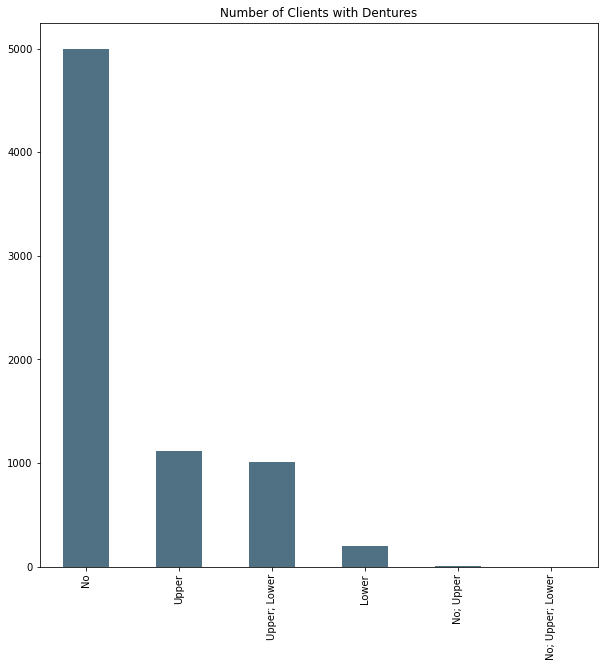

In [24]:
denture.plot(kind = 'bar', figsize = (10,10), color = '#507184ff', 
             title = 'Number of Clients with Dentures')

In [25]:
zip_codes = smile2['PostalCode'].value_counts()

In [26]:
print(zip_codes)

37130.0    1681
37013.0    1399
37207.0    1195
37211.0    1053
37115.0    1011
           ... 
37729.0       1
37625.0       1
37409.0       1
37370.0       1
30741.0       1
Name: PostalCode, Length: 511, dtype: int64


<AxesSubplot:>

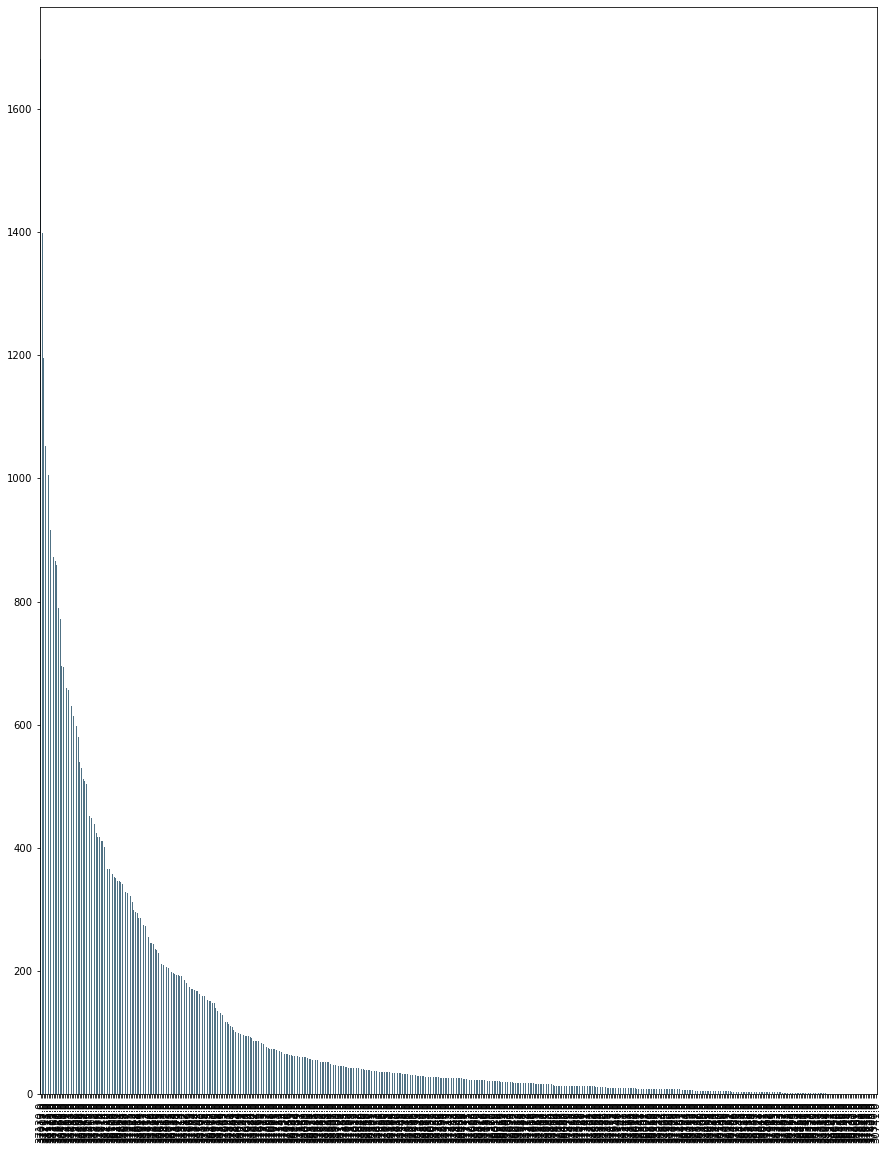

In [27]:
zip_codes.plot(kind = 'bar',figsize = (15,20), color = '#507184ff')

In [28]:
complete_program = smile2['Treatment Plan - Is the treatment plan completed?'].value_counts()

In [29]:
print(complete_program)

No     19382
Yes     7823
Name: Treatment Plan - Is the treatment plan completed?, dtype: int64


<AxesSubplot:>

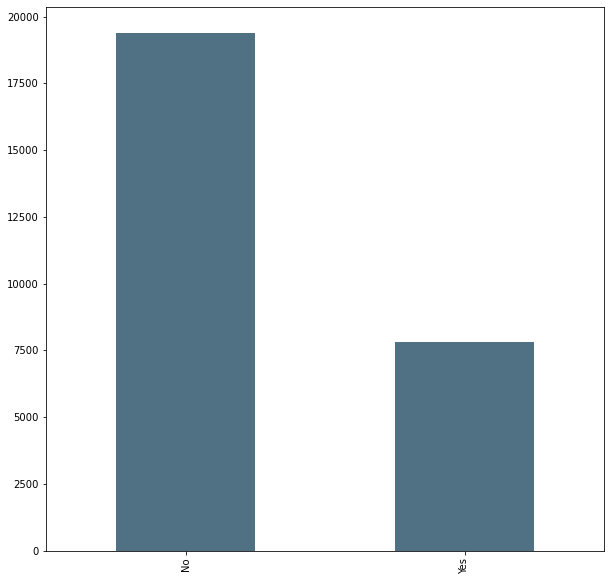

In [30]:
complete_program.plot(kind = 'bar',figsize = (10,10), color = '#507184ff')

In [31]:
success_plans = smile2['Treatment Plan - Was the enrollee able to be restored to function (can chew) and "social six" esthetics (top front six teeth are present and disease free)'].nunique()

In [46]:
success_plans = smile2['Treatment Plan - Was the enrollee able to be restored to function (can chew) and "social six" esthetics (top front six teeth are present and disease free)'].value_counts()

<AxesSubplot:>

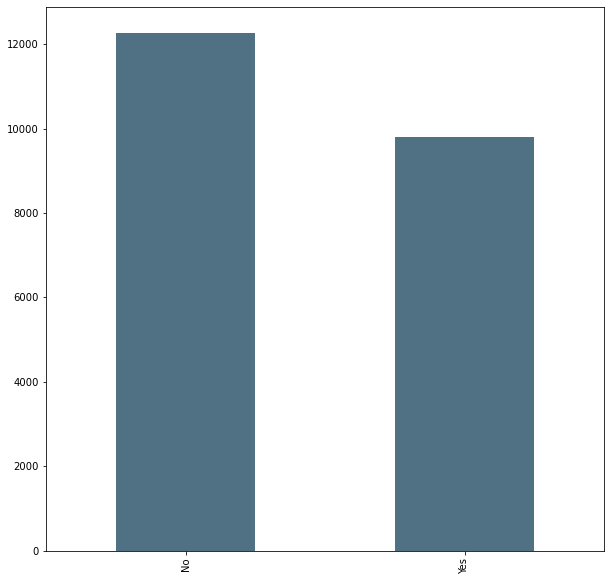

In [47]:
success_plans.plot(kind = 'bar',figsize = (10,10), color = '#507184ff')

In [62]:
social_six = smile2.groupby(['Treatment Plan - Was the enrollee able to be restored to function (can chew) and "social six" esthetics (top front six teeth are present and disease free)'])['PatientID'].nunique()

In [63]:
print(social_six)

Treatment Plan - Was the enrollee able to be restored to function (can chew) and "social six" esthetics (top front six teeth are present and disease free)
No     4221
Yes    4472
Name: PatientID, dtype: int64


<AxesSubplot:xlabel='Treatment Plan - Was the enrollee able to be restored to function (can chew) and "social six" esthetics (top front six teeth are present and disease free)'>

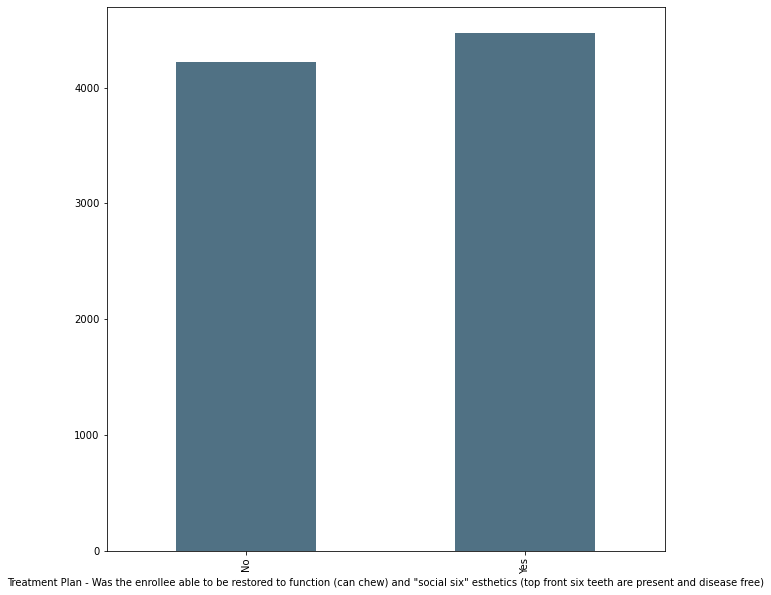

In [64]:
social_six.plot(kind = 'bar',figsize = (10,10), color = '#507184ff')

In [ ]:
print(client_bycounty)

In [ ]:
client_bycounty.plot(kind = 'bar',figsize = (10,10), color = '#507184ff',
                   title = 'Number of Clients Per County')

#Liu's code 
#smile.groupby(['gender','race'])["CallerNum"].nunique().reset_index()

In [ ]:
smile2.groupby(['Demographic Information - Gender','Demographic Information - Race/Ethnicity']).nunique().reset_index()

In [ ]:
dentures2 = smile2.groupby(['Screening - Do you have removable dentures?','Screening - Do you usually wear your denture(s) when you eat?',
                'Demographic Information - Race/Ethnicity','Demographic Information - Gender','Treatment Plan - Is the treatment plan completed?','CountyName']).nunique().reset_index()

In [ ]:
print(dentures2)

In [ ]:
dentures2.plot(kind = 'bar')

In [ ]:
treatments = smile2.groupby(['Demographic Information - Gender','Treatment Plan - Is the treatment plan completed?']).nunique().reset_index()
treatments

In [ ]:
treatments.plot(kind = 'bar')

In [50]:
gender = smile2.groupby(['Demographic Information - Gender']).nunique()

In [51]:
print(gender)

                                  CalliD  ReportVersion  \
Demographic Information - Gender                          
Female                             35855              2   
Male                               21462              2   
Other                                  1              1   
Transgender                           21              2   

                                  LinkedToCallReportNum  CallDateAndTimeStart  \
Demographic Information - Gender                                                
Female                                                2                 34303   
Male                                                  1                 20942   
Other                                                 1                     1   
Transgender                                           1                    21   

                                  CallDateAndTimeEnd  CallLength  PatientID  \
Demographic Information - Gender                                              


In [ ]:
gender.plot(kind = 'bar')

In [ ]:
smile2['SMILE ON 60+ Oral Care Encounter - 7970 - Mandibular Quantity']

In [ ]:
smile2['SMILE ON 60+ Oral Care Encounter - No Code - Denture Step Mandibular Quantity']

In [52]:
teeth = smile2.groupby(['SMILE ON 60+ Screening - # of Upper Natural Teeth','Demographic Information - Gender']).nunique().reset_index()
teeth

,SMILE ON 60+ Screening - # of Upper Natural Teeth,Demographic Information - Gender,CalliD,ReportVersion,LinkedToCallReportNum,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,PatientID,PhoneWorkerNum,WasRealCall,WasHangup,WasSexCall,WasWrongNumber,WasPrankCall,WasSilentCall,GeoCode,GeoAssignment,CityName,CountyName,StateProvince,CountryName,PostalCode,CensusDivision,CensusTrack,CensusReportingArea,211Region,PhoneType,ThirdPartyName,ThirdPartyOrganization,ThirdPartyPhoneNumber,ThirdPartyAddress,ThirdPartyCity,ThirdPartyCounty,ThirdPartyStateProvince,ThirdPartyPostalCode,Narrative,VolunteerComments,Feedback,EnteredByWorkerNum,EnteredOn,Reviewed,FeedbackStatus,FeedbackFromPhoneWorkerNum,FeedbackFromPhoneWorkerName,ReferralsMade,OrgNum,Demographic Information - # of People in Household,Birth Year,SMILE ON 60+ Demographic Information - Other Language,SMILE ON 60+ Notes (Optional) - Notes,SMILE ON 60+ Oral Care Encounter - 1351 - Quantity,SMILE ON 60+ Oral Care Encounter - 1354 - Quantity,SMILE ON 60+ Oral Care Encounter - 2140 - Quantity,SMILE ON 60+ Oral Care Encounter - 2150 - Quantity,SMILE ON 60+ Oral Care Encounter - 2160 - Quantity,SMILE ON 60+ Oral Care Encounter - 2161 - Quantity,SMILE ON 60+ Oral Care Encounter - 220 - Quantity,SMILE ON 60+ Oral Care Encounter - 230 - Quantity,SMILE ON 60+ Oral Care Encounter - 2330 - Quantity,SMILE ON 60+ Oral Care Encounter - 2331 - Quantity,SMILE ON 60+ Oral Care Encounter - 2332 - Quantity,SMILE ON 60+ Oral Care Encounter - 2335 - Quantity,SMILE ON 60+ Oral Care Encounter - 2390 - Quantity,SMILE ON 60+ Oral Care Encounter - 2391 - Quantity,SMILE ON 60+ Oral Care Encounter - 2392 - Quantity,SMILE ON 60+ Oral Care Encounter - 2393 - Quantity,SMILE ON 60+ Oral Care Encounter - 2394 - Quantity,SMILE ON 60+ Oral Care Encounter - 2915 - Quantity,SMILE ON 60+ Oral Care Encounter - 2920 - Quantity,SMILE ON 60+ Oral Care Encounter - 2933 - Quantity,SMILE ON 60+ Oral Care Encounter - 2940 - Quantity,SMILE ON 60+ Oral Care Encounter - 2950 - Quantity,SMILE ON 60+ Oral Care Encounter - 2954 - Quantity,SMILE ON 60+ Oral Care Encounter - 2955 - Quantity,SMILE ON 60+ Oral Care Encounter - 2980 - Quantity,SMILE ON 60+ Oral Care Encounter - 3220 - Quantity,SMILE ON 60+ Oral Care Encounter - 4341 - Quantity,SMILE ON 60+ Oral Care Encounter - 4342 - Quantity,SMILE ON 60+ Oral Care Encounter - 6930 - Quantity,SMILE ON 60+ Oral Care Encounter - 6980 - Quantity,SMILE ON 60+ Oral Care Encounter - 7111 - Quantity,SMILE ON 60+ Oral Care Encounter - 7140 - Quantity,SMILE ON 60+ Oral Care Encounter - 7210 - Quantity,SMILE ON 60+ Oral Care Encounter - 7220 - Quantity,SMILE ON 60+ Oral Care Encounter - 7230 - Quantity,SMILE ON 60+ Oral Care Encounter - 7240 - Quantity,SMILE ON 60+ Oral Care Encounter - 7241 - Quantity,SMILE ON 60+ Oral Care Encounter - 7250 - Quantity,SMILE ON 60+ Oral Care Encounter - 7261 - Quantity,SMILE ON 60+ Oral Care Encounter - 7285 - Quantity,SMILE ON 60+ Oral Care Encounter - 7286 - Quantity,SMILE ON 60+ Oral Care Encounter - 7310 - Quantity,SMILE ON 60+ Oral Care Encounter - 7311 - Quantity,SMILE ON 60+ Oral Care Encounter - 7320 - Quantity,SMILE ON 60+ Oral Care Encounter - 7321 - Quantity,SMILE ON 60+ Oral Care Encounter - 7410 - Quantity,SMILE ON 60+ Oral Care Encounter - 7411 - Quantity,SMILE ON 60+ Oral Care Encounter - 7412 - Quantity,SMILE ON 60+ Oral Care Encounter - 7413 - Quantity,SMILE ON 60+ Oral Care Encounter - 7414 - Quantity,SMILE ON 60+ Oral Care Encounter - 7415 - Quantity,SMILE ON 60+ Oral Care Encounter - 7440 - Quantity,SMILE ON 60+ Oral Care Encounter - 7450 - Quantity,SMILE ON 60+ Oral Care Encounter - 7451 - Quantity,SMILE ON 60+ Oral Care Encounter - 7460 - Quantity,SMILE ON 60+ Oral Care Encounter - 7461 - Quantity,SMILE ON 60+ Oral Care Encounter - 7471 - Quantity,SMILE ON 60+ Oral Care Encounter - 7510 - Quantity,SMILE ON 60+ Oral Care Encounter - 7511 - Quantity,SMILE ON 60+ Oral Care Encounter - 7970 - Mandibular Quantity,SMILE ON 60+ Oral Care Encounter

In [ ]:
teeth.plot(kind = 'bar')

In [ ]:
smile2['SMILE ON 60+ Screening - # of Lower Natural Teeth'].nunique()

#Michael F renaming code

In [ ]:
smile2 = smile2.rename(columns={'SMILE ON 60+ Oral Care Encounter - 5110 - Quantity': 'Complete Denture - maxillary - 60'})
smile2 = smile2.rename(columns={'SMILE ON 60+ Oral Care Encounter - 5120 - Quantity': 'Complete Denture - mandible - 60'})
smile2 = smile2.rename(columns={'SMILE ON 60+ Oral Care Encounter - 5130 - Quantity': 'Complete Denture - immediate maxillary - 60'})
smile2 = smile2.rename(columns={'SMILE ON 60+ Oral Care Encounter - 5140 - Quantity': 'Complete Denture - immediate mandible - 60'})
smile2 = smile2.rename(columns={'SMILE ON 60+ Oral Care Encounter - 5211 - Quantity': 'Partial denture -resin base-maxillary - 60'})
smile2 = smile2.rename(columns={'SMILE ON 60+ Oral Care Encounter - 5212 - Quantity': 'Partial denture -resin base-mandible - 60'})
smile2 = smile2.rename(columns={'SMILE ON 60+ Oral Care Encounter - 5213 - Quantity': 'Partial denture-metal base-maxillary - 60'})
smile2 = smile2.rename(columns={'SMILE ON 60+ Oral Care Encounter - 5214 - Quantity': 'Partial denture-metal base-mandible - 60'})
smile2 = smile2.rename(columns={'SMILE ON 60+ Oral Care Encounter - 5221 - Quantity': 'Partial denture - resin base - immediate maxillary - 60'})
smile2 = smile2.rename(columns={'SMILE ON 60+ Oral Care Encounter - 5222 - Quantity': 'Partial denture - resin base - immediate mandible - 60'})
smile2 = smile2.rename(columns={'SMILE ON 60+ Oral Care Encounter - 5225 - Quantity': 'Partial denture - flexible base - maxillary - 60'})
smile2 = smile2.rename(columns={'SMILE ON 60+ Oral Care Encounter - 5226 - Quantity': 'Partial denture - flexible base - mandible - 60'})
smile2 = smile2.rename(columns={'SMILE ON 60+ Oral Care Encounter - 5410 - Quantity': 'Adjust complete denture-maxillary - 15'})
smile2 = smile2.rename(columns={'SMILE ON 60+ Oral Care Encounter - 5411 - Quantity': 'Adjust complete denture-mandibular - 15'})
smile2 = smile2.rename(columns={'SMILE ON 60+ Oral Care Encounter - 5421 - Quantity': 'Adjust partial denture-maxillary - 15'})
smile2 = smile2.rename(columns={'SMILE ON 60+ Oral Care Encounter - 5422 - Quantity': 'Adjust partial denture-mandibular - 15'})
smile2 = smile2.rename(columns={'SMILE ON 60+ Oral Care Encounter - 5511 - Quantity': 'Repair broken complete denture base mandibular - 30'})
smile2 = smile2.rename(columns={'SMILE ON 60+ Oral Care Encounter - 5512 - Quantity': 'Repair broken complete denture base maxillary - 30'})
smile2 = smile2.rename(columns={'SMILE ON 60+ Oral Care Encounter - 5520 - Quantity': 'Replace broken/missing denture teeth complete denture - 30'})
smile2 = smile2.rename(columns={'SMILE ON 60+ Oral Care Encounter - 5611 - Quantity': 'Repair resin partial denture base, mandibular - 30'})
smile2 = smile2.rename(columns={'SMILE ON 60+ Oral Care Encounter - 5612 - Quantity': 'Repair resin partial denture base, maxillary - 30'})
smile2 = smile2.rename(columns={'SMILE ON 60+ Oral Care Encounter - 5621 - Quantity': 'Repair cast partial denture frame, mandibular - 30'})
smile2 = smile2.rename(columns={'SMILE ON 60+ Oral Care Encounter - 6930 - Quantity': 'Recement bridge - 15 +- 6930'})
smile2 = smile2.rename(columns={'SMILE ON 60+ Oral Care Encounter - 6980 - Quantity': 'Bridge repair - 15 +- 6980'})



In [ ]:
n = smile.count()
nn = n.sort_values(ascending=False)

nn

In [ ]:
nnn = nn[1:7]

smile_success[nnn]

import matplotlib.pyplot as plt
import numpy as np

def scatterplot(x_data, y_data, x_label="", y_label="", title="", color = "r", yscale_log=False):

    # Create the plot object
    _, ax = plt.subplots()

    # Plot the data, set the size (s), color and transparency (alpha)
    # of the points
    ax.scatter(x_data, y_data, s = 10, color = color, alpha = 0.75)

    if yscale_log == True:
        ax.set_yscale('log')

    # Label the axes and provide a title
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
view raw

In [ ]:
treatments.scatter('Treatment Plan - Is the treatment plan completed?', 'Screening - Do you have removable dentures?', s = 10, color = '#507184', alpha = 0.75)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate data...
x = np.random.random(10)
y = np.random.random(10)

plt.scatter(x, y, c=y, s=500, cmap='gray')
plt.show()

In [ ]:
smile2['Treatment Plan - Is the treatment plan completed?'].value_counts().plot.hist()